In [22]:
from google.colab import files
uploaded = files.upload()

Saving online_gaming_behavior_dataset.csv to online_gaming_behavior_dataset.csv


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.3f}'.format

In [24]:
ds=datasets.load_diabetes()

In [25]:
df = pd.DataFrame(data=ds.data, columns=ds.feature_names)
df['response(y)'] = ds.target

In [26]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,response(y)
0,0.038,0.051,0.062,0.022,-0.044,-0.035,-0.043,-0.003,0.020,-0.018,151.000
1,-0.002,-0.045,-0.051,-0.026,-0.008,-0.019,0.074,-0.039,-0.068,-0.092,75.000
2,0.085,0.051,0.044,-0.006,-0.046,-0.034,-0.032,-0.003,0.003,-0.026,141.000
3,-0.089,-0.045,-0.012,-0.037,0.012,0.025,-0.036,0.034,0.023,-0.009,206.000
4,0.005,-0.045,-0.036,0.022,0.004,0.016,0.008,-0.003,-0.032,-0.047,135.000


In [27]:
print(ds['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  response(y)  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [29]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,response(y)
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


In [30]:
X, y = datasets.load_diabetes(return_X_y=True)

In [31]:
X_trainN, X_testN, y_trainN, y_testN = train_test_split(X, y, test_size=0.30)

X_train=torch.from_numpy(X_trainN.astype(np.float32))
y_train=torch.from_numpy(y_trainN.astype(np.float32)).reshape(-1,1)
X_test=torch.from_numpy(X_testN.astype(np.float32))
y_test=torch.from_numpy(y_testN.astype(np.float32)).reshape(-1,1)

In [32]:
n_samples, n_features = X_train.shape

In [33]:
model=nn.Linear(n_features, 1)

lr=0.2
n_epoch=1000

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)
train_loss=[]
test_loss=[]


for epoch in range(n_epoch):
    y_pred=model(X_train)
    loss=lossfunc(y_train, y_pred)
    loss.backward()
    train_loss.append(loss.item())
    optimizer.step()
    optimizer.zero_grad()

    [w,b]=model.parameters()

    with torch.inference_mode():
        y_test_pred=model(X_test)
        lost_test=lossfunc(y_test, y_test_pred)
        test_loss.append(lost_test)

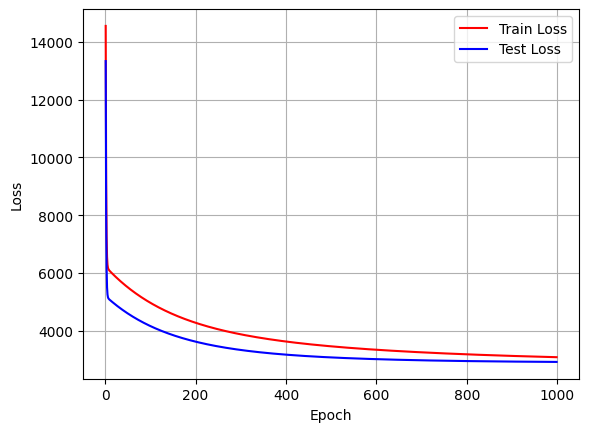

In [34]:
fig=plt.figure()
xv=np.arange(1, n_epoch,1)
plt.plot(xv,train_loss[1:], 'r', label="Train Loss")
plt.plot(xv,test_loss[:-1], 'b', label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
fig.show()

In [35]:
with torch.inference_mode():
    y_test_pred=model(X_test)
print('Coefficient of determination: %.2f' % r2_score(y_test, y_test_pred))

Coefficient of determination: 0.44


In [36]:
regr = LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

print('Coefficient of determination: %.2f' % r2_score(y_test, pred))

Coefficient of determination: 0.43


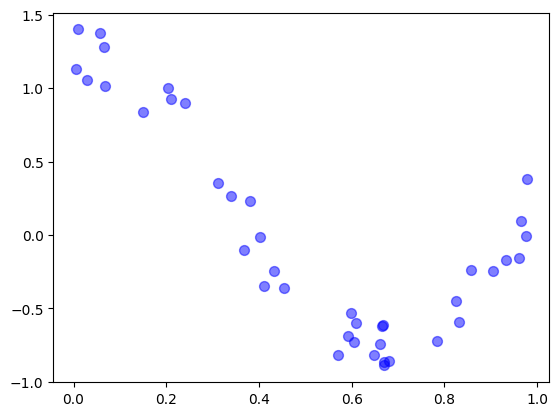

In [37]:
n_samples=40
X = np.random.rand(n_samples)
y=np.cos(1.5 * np.pi * X)+0.5*np.random.rand(n_samples)
X=X.reshape(-1,1)

fig=plt.figure()
plt.scatter(X,y, c='b', s=50, alpha=.5)
fig.show()

In [38]:
poly = PolynomialFeatures(degree=3, include_bias=True)
poly_features = poly.fit_transform(X)
poly_features[10], X[10]

(array([1.        , 0.43150973, 0.18620065, 0.08034739]), array([0.43150973]))

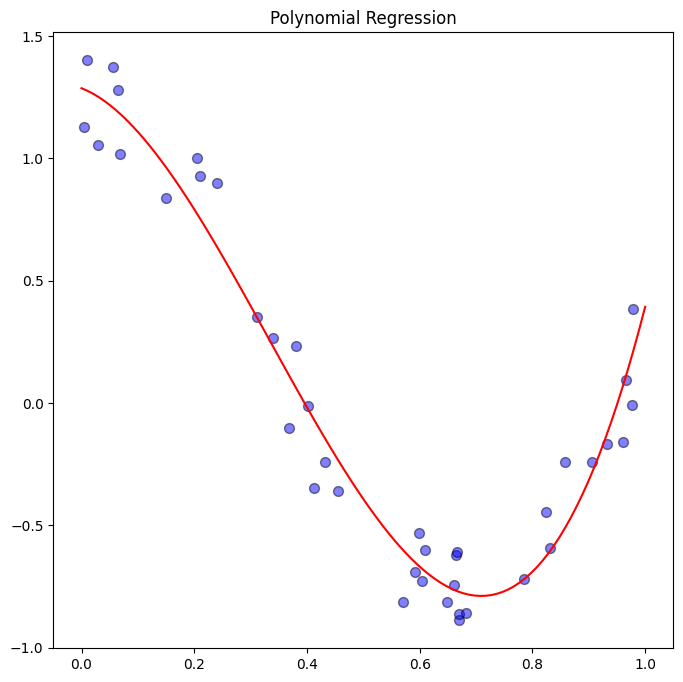

In [39]:
poly_model = LinearRegression()
poly_model.fit(poly_features, y)


fig=plt.figure(figsize=(8,8))

xv=np.linspace(0,1,100).reshape(-1,1)
xv_to_poly=poly.transform(xv)
y_pred = poly_model.predict(xv_to_poly)
plt.plot(xv, y_pred, '-r')


plt.scatter(X,y, c='b', s=50, alpha=.5, edgecolor='k')

plt.title('Polynomial Regression')
plt.show()